# Task 1.2: Preprocess and EDA

In [1]:
# Imports and setup
import sys
sys.path.append("../src")
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from glob import glob
import importlib
import data_processing

#### Data Loading

In [2]:
# import the data fetching function
from data_processing import load_asset_data

In [3]:
# Load and clean data
tickers = ["TSLA", "BND", "SPY"]
dfs = load_asset_data(tickers)
# Display the first few rows of each DataFrame
for ticker, df in dfs.items():
    print(f"Data for {ticker}:")
    print(df.head())
    print("\n")

Data for TSLA:
                 Open       High        Low      Close     Volume
Date                                                             
2015-07-01  18.073999  18.174667  17.856667  17.943333   31518000
2015-07-02  18.680000  18.830000  18.220667  18.667999  107458500
2015-07-06  18.591999  18.779333  18.420000  18.648001   61828500
2015-07-07  18.333332  18.346666  17.384666  17.858667   91576500
2015-07-08  17.288000  17.386667  16.954000  16.997334   93316500


Data for BND:
                 Open       High        Low      Close   Volume
Date                                                           
2015-07-01  60.794202  60.914479  60.764131  60.816753  5399300
2015-07-02  60.937016  61.027228  60.937016  60.967087  1060100
2015-07-06  61.222676  61.222676  61.057289  61.177567  2210700
2015-07-07  61.410626  61.470762  61.237720  61.237720  4183200
2015-07-08  61.373032  61.463244  61.312890  61.410622  1967800


Data for SPY:
                  Open        High         

#### Data Cleaning

In [4]:
from data_processing import clean_data
dfs = clean_data(dfs)

/home/chalasimon/Documents/10academy/week 11/challenges/GMF-Time-Series-Forecasting-for-Portfolio-Optimization/notebooks/../src/data_processing.py:30: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
/home/chalasimon/Documents/10academy/week 11/challenges/GMF-Time-Series-Forecasting-for-Portfolio-Optimization/notebooks/../src/data_processing.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


#### Basic stats & missing data check

In [5]:
for t in tickers:
    print(f"Basic statistics for {t}:")
    display(dfs[t].describe())
    display("Missing values:\n", dfs[t].isna().sum(), "\n")

Basic statistics for TSLA:


,Open,High,Low,Close,Volume
count,2535.000000,2535.000000,2535.000000,2535.000000,2.535000e+03
mean,132.000600,134.960429,128.837831,131.963002,1.141789e+08
std,121.034152,123.783736,117.996631,120.914904,7.332146e+07
min,9.488000,10.331333,9.403333,9.578000,1.062000e+07
25%,18.901000,19.279667,18.575334,18.967667,6.908220e+07
50%,94.400665,97.666664,91.734001,94.571335,9.537450e+07
75%,235.851669,240.881668,232.170006,236.761665,1.322551e+08
max,475.899994,488.540009,457.510010,479.859985,9.140820e+08


'Missing values:\n'

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

'\n'

Basic statistics for BND:


,Open,High,Low,Close,Volume
count,2535.000000,2535.000000,2535.000000,2535.000000,2.535000e+03
mean,68.471392,68.571174,68.364920,68.469188,4.434376e+06
std,4.555995,4.563591,4.544724,4.554602,2.899511e+06
min,60.786698,60.899462,60.764131,60.779179,0.000000e+00
25%,64.660590,64.731250,64.570656,64.654366,2.182050e+06
50%,67.589066,67.749353,67.474065,67.604889,4.121100e+06
75%,71.886235,72.018947,71.780704,71.891136,5.890100e+06
max,77.378741,77.413299,77.283673,77.318237,3.396300e+07


'Missing values:\n'

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

'\n'

Basic statistics for SPY:


,Open,High,Low,Close,Volume
count,2535.000000,2535.000000,2535.000000,2535.000000,2.535000e+03
mean,334.125538,335.981618,332.114635,334.193732,8.503521e+07
std,126.391138,127.053089,125.661287,126.427704,4.428796e+07
min,155.426561,156.926792,153.758426,155.869812,2.027000e+07
25%,231.007855,234.024924,228.661756,230.083214,5.779150e+07
50%,304.715012,306.143504,302.033100,305.264465,7.451530e+07
75%,420.117497,423.114882,417.754486,420.350540,9.789180e+07
max,638.349976,638.669983,635.539978,637.099976,5.072443e+08


'Missing values:\n'

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

'\n'

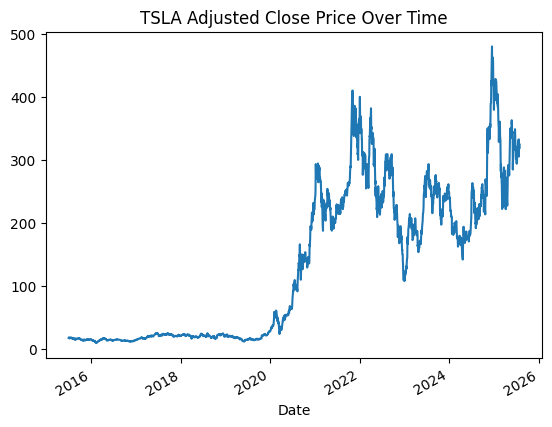

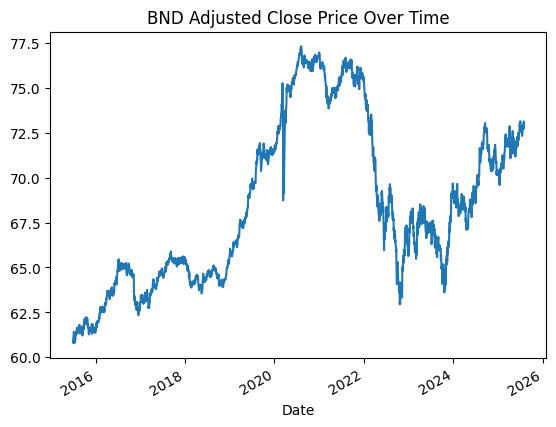

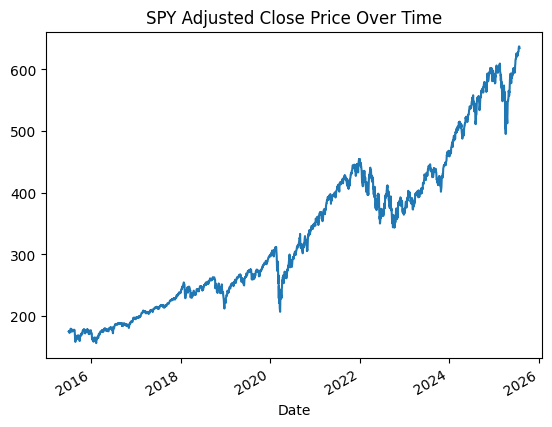

In [6]:
# Visualize closing prices
for t in tickers:
    dfs[t]['Close'].plot(title=f"{t} Adjusted Close Price Over Time")
    plt.show()

#### Calculate returns and visualize

In [9]:
# import function to calculate returns
importlib.reload(data_processing)
from data_processing import calculate_returns

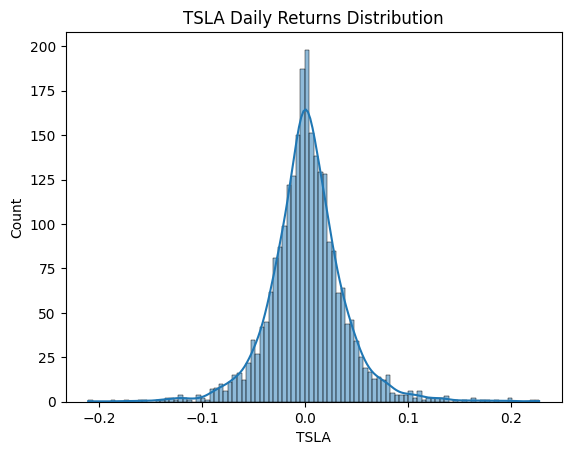

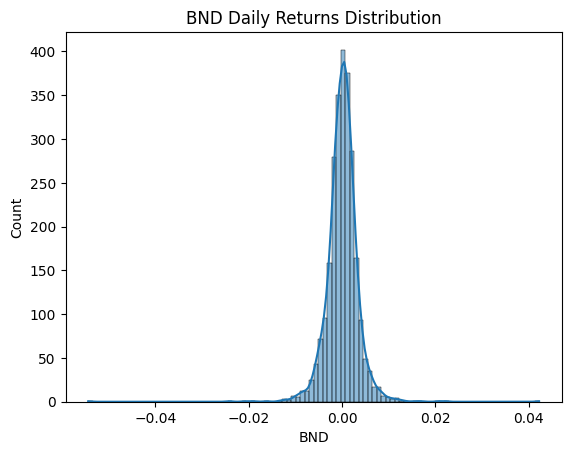

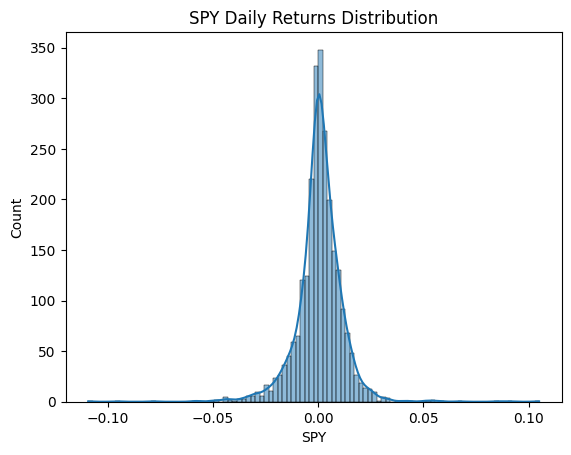

In [10]:
# Calculate daily returns
returns = calculate_returns(dfs)

# Plot daily percentage returns (volatility)
for t in tickers:
    sns.histplot(returns[t], bins=100, kde=True)
    plt.title(f"{t} Daily Returns Distribution")
    plt.show()

In [ ]:
# Rolling Volatility (21-day window)
vol = rolling_volatility(returns)
for t in tickers:
    vol[t].plot(title=f"{t} 21-Day Rolling Annualized Volatility")
    plt.show()